In [1]:
# Conectar con Google Drive
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Concentracion AI/Modulo 2 Arq de Deep Learning/Entregable"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Concentracion AI/Modulo 2 Arq de Deep Learning/Entregable


In [2]:
# Importar las librerias a utilizar
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [3]:
# Data generators
base_dir = 'Flowers'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(1./255)

train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 20,
							class_mode ='sparse')

val_datagen = ImageDataGenerator(1./255)

val_generator = val_datagen.flow_from_directory(
					validation_dir,
					target_size = (150, 150),
					batch_size = 20,
					class_mode= 'sparse')

test_datagen = ImageDataGenerator(1./255)

test_generator = test_datagen.flow_from_directory(
							test_dir,
							target_size = (150, 150),
							batch_size = 20,
							class_mode ='sparse')


Found 1514 images belonging to 4 classes.
Found 424 images belonging to 4 classes.
Found 551 images belonging to 4 classes.


In [4]:
# Contador de imagenes de cada folder
def count(folder_path):
    counting = 0

    for root, dirs, files in os.walk(folder_path):
        for file in files:
          counting += 1

    return counting

In [5]:
def count_subfolder(subfolder_p):
  total_images = 0

  for subfolder in ["daisy", "dandelion", "sunflower", "tulip"]:
    subfolder_path = os.path.join(subfolder_p, subfolder)
    subfolder_images = count(subfolder_path)
    print(f"Númbero de imagenes en '{subfolder}': {subfolder_images}")
    total_images += subfolder_images

In [6]:
print("Imagenes en la carpeta de Train")
count_subfolder(train_dir)
print("\nImagenes en la carpeta de Test")
count_subfolder(test_dir)
print("\nImagenes en la carpeta de Validation")
count_subfolder(validation_dir)

Imagenes en la carpeta de Train
Númbero de imagenes en 'daisy': 357
Númbero de imagenes en 'dandelion': 397
Númbero de imagenes en 'sunflower': 374
Númbero de imagenes en 'tulip': 386

Imagenes en la carpeta de Test
Númbero de imagenes en 'daisy': 148
Númbero de imagenes en 'dandelion': 134
Númbero de imagenes en 'sunflower': 138
Númbero de imagenes en 'tulip': 136

Imagenes en la carpeta de Validation
Númbero de imagenes en 'daisy': 108
Númbero de imagenes en 'dandelion': 101
Númbero de imagenes en 'sunflower': 108
Númbero de imagenes en 'tulip': 109


In [7]:
class_labels = train_generator.class_indices
class_labels

{'daisy': 0, 'dandelion': 1, 'sunflower': 2, 'tulip': 3}

## Modelo 1

In [8]:
# Sequential convolutional neural network model
model =  Sequential([
    Conv2D(8, kernel_size=3, padding='same', activation="relu", input_shape=(150,150,3)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
 ])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 8)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 45000)             0         
                                                                 
 dense (Dense)               (None, 64)                2880064   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                        

In [10]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

### Entrenamiento

In [19]:
# Entrenamiento
history = model.fit(train_generator,
				steps_per_epoch = 10,
				epochs = 20,
				validation_data = val_generator,
				validation_steps = 5)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


10/10 [==============================] - 7s 736ms/step - loss: 4.0709 - accuracy: 0.7216 - val_loss: 15.5117 - val_accuracy: 0.5400
Epoch 2/20
10/10 [==============================] - 5s 493ms/step - loss: 2.3457 - accuracy: 0.7900 - val_loss: 4.6062 - val_accuracy: 0.6900
Epoch 3/20
10/10 [==============================] - 4s 454ms/step - loss: 2.1885 - accuracy: 0.7900 - val_loss: 6.3080 - val_accuracy: 0.6200
Epoch 4/20
10/10 [==============================] - 5s 493ms/step - loss: 1.7209 - accuracy: 0.8150 - val_loss: 6.8797 - val_accuracy: 0.6800
Epoch 5/20
10/10 [==============================] - 4s 368ms/step - loss: 1.3621 - accuracy: 0.8650 - val_loss: 5.6652 - val_accuracy: 0.6100
Epoch 6/20
10/10 [==============================] - 3s 347ms/step - loss: 0.9851 - accuracy: 0.8650 - val_loss: 5.3847 - val_accuracy: 0.6600
Epoch 7/20
10/10 [==============================] - 6s 653ms/step - loss: 0.6265 - accuracy: 0.9150 - val_loss: 10.3974 - val_accuracy: 0.6100
Epoch 8/20
10/1

In [20]:
'''# Se guarda el modelo
model.save('FirstFlowers.h5')'''

"# Se guarda el modelo\nmodel.save('FirstFlowers.h5')"

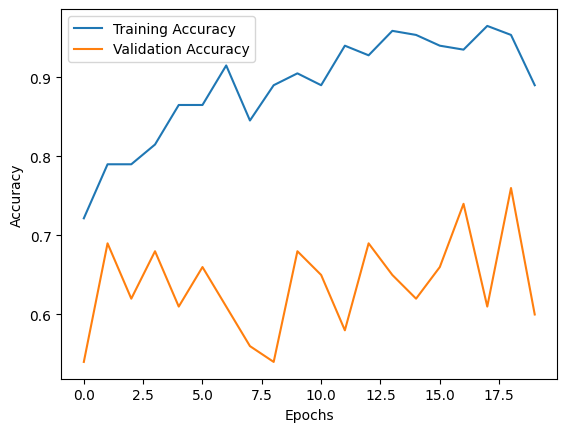

In [21]:
# Grafica del accuracy en train y en validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Pruebas

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [23]:
# Realizar predicciones
prediction = model.predict(test_generator)

# Obtener true labels
true_label = test_generator.classes

# Obtener predicted labels
predicted_label = np.argmax(prediction, axis=1)

28/28 [==============================] - 6s 214ms/step


In [24]:
# Prueba con los datos de test
test_loss, test_acc = model.evaluate(test_generator, steps = 10)
print('\nTest accuracy :\n', test_acc)

10/10 [==============================] - 2s 175ms/step - loss: 4.2102 - accuracy: 0.6450

Test accuracy :
 0.6449999809265137


In [25]:
# Matriz de confusión
cMatrix = confusion_matrix(true_label, predicted_label)

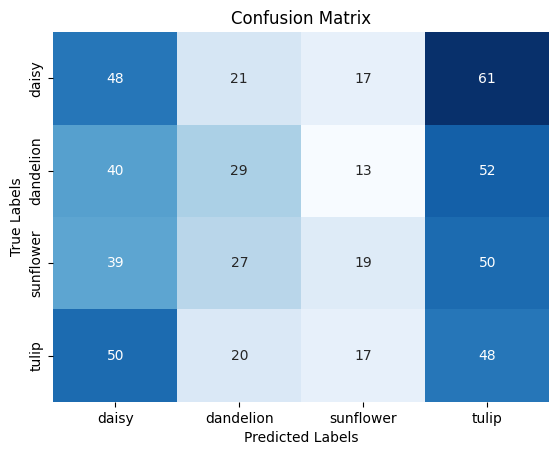

In [27]:
# Grafica de la matriz de confusión
sns.heatmap(cMatrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
